In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv('homeprices (1).csv')
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [13]:
df.drop(columns=['age'], inplace=True)
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,595000
4,4000,760000


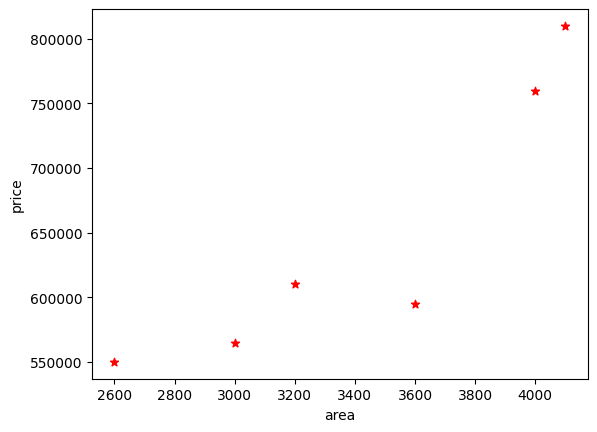

In [14]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='*')
plt.show()

In [15]:
new_df=df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000
5,4100


In [16]:
price=df.price
price

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

In [17]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression()
reg.fit(new_df, price)

LinearRegression()

In [20]:
pred=reg.predict(new_df)
pred

array([511697.20347155, 578621.02217936, 612082.93153327, 679006.75024108,
       745930.56894889, 762661.52362584])

In [21]:
from sklearn.metrics import r2_score

In [22]:
r2_score(price,pred)

0.8126597526459413

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
reg.predict([[3300]])

array([628813.88621022])

In [27]:
reg.coef_

array([167.30954677])

In [28]:
reg.intercept_

np.float64(76692.3818707813)

In [29]:
3300*167.30954677 + 76692.3818707813

628813.8862117813

In [30]:
reg.predict([[3000]])

array([578621.02217936])

# genrate csv file with lost of home price prediction

In [31]:
a_df=pd.read_csv('areas.csv')
a_df.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [32]:
p=reg.predict(a_df)
p

array([ 244001.92864031,  327656.70202507,  461504.33944069,
        668968.17743491,  766007.71456123,  839623.91513983,
        995221.79363549,  655583.41369335,  871412.72902604,
        461504.33944069, 1582478.30279653, 1515554.48408872,
       1264590.16393443])

In [34]:
a_df['prices']=p
a_df

,area,prices
0,1000,2.440019e+05
1,1500,3.276567e+05
2,2300,4.615043e+05
3,3540,6.689682e+05
4,4120,7.660077e+05
5,4560,8.396239e+05
6,5490,9.952218e+05
7,3460,6.555834e+05
8,4750,8.714127e+05
9,2300,4.615043e+05


In [36]:
a_df.to_csv('prediction.csv',index=False)